In [1]:
# till now we used lasso and regression method for feature selection, but visuals and graphs are also a good way for doing
# feature selection
import pandas as pd

In [2]:
dataset = pd.read_csv('titanic_train.csv')

In [3]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# seaborn creates more advanced visuals.
import seaborn as sns

In [7]:
dataset['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [8]:
gender = dataset['Sex']

<AxesSubplot:xlabel='Sex', ylabel='count'>

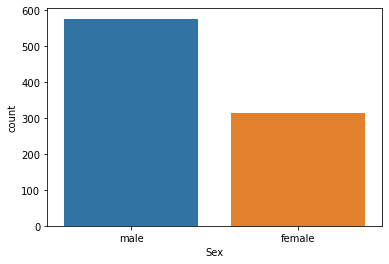

In [9]:
# Our target is to find whether a person will survive or not, to predict whether sex is correlated to survival or not, we need
# to predict who has more ratio of survival - male or female? , if ratio of survival is same for both male and female, that
# means sex is not a significant field in predicting the survival, but if the ratio is different, that means gender
# does matter in predicting whether the person will survive or not.
sns.countplot(gender)

In [10]:
# It's clearly visible that in titanic, number of males is more than than the number of females, but we're looking for who
# survived more.
survived = dataset['Survived']

<AxesSubplot:xlabel='Survived', ylabel='count'>

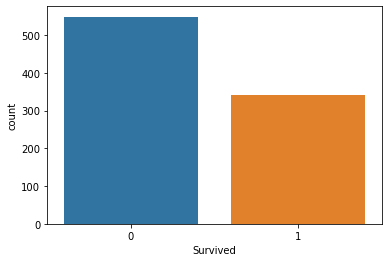

In [11]:
sns.countplot(survived)

<AxesSubplot:xlabel='Survived', ylabel='count'>

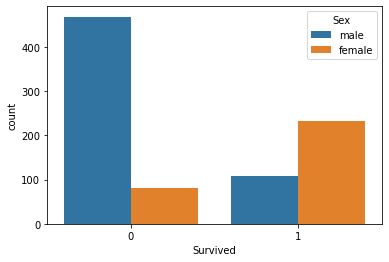

In [12]:
# We can see that very less ppl survived, but if we want to know the ratio of males and females who survived, this concept is
# known as DATA AGGREGATION. We're aggregating the data by group, to do that:
sns.countplot(survived, hue='Sex', data=dataset)

In [13]:
# Now we can clearly see the difference, female survived more as compared to male. So sex is one of the significant feature in 
# the dataset and we can never eliminate this feature.

In [14]:
pclass = dataset['Pclass']

<AxesSubplot:xlabel='Pclass', ylabel='count'>

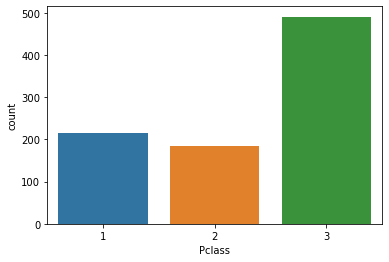

In [15]:
sns.countplot(pclass)

<AxesSubplot:xlabel='Survived', ylabel='count'>

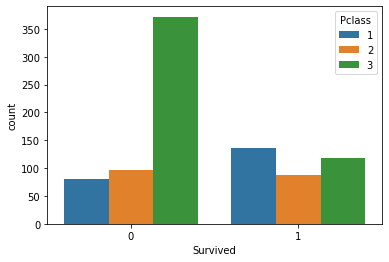

In [16]:
sns.countplot(survived, hue='Pclass', data=dataset)

In [17]:
# Again by looking at the graph or the visuals, anyone can say that chances of survival is more in the first class. So we can
# that Pclass is also a significant feature for predicting the target.

<AxesSubplot:xlabel='Survived', ylabel='count'>

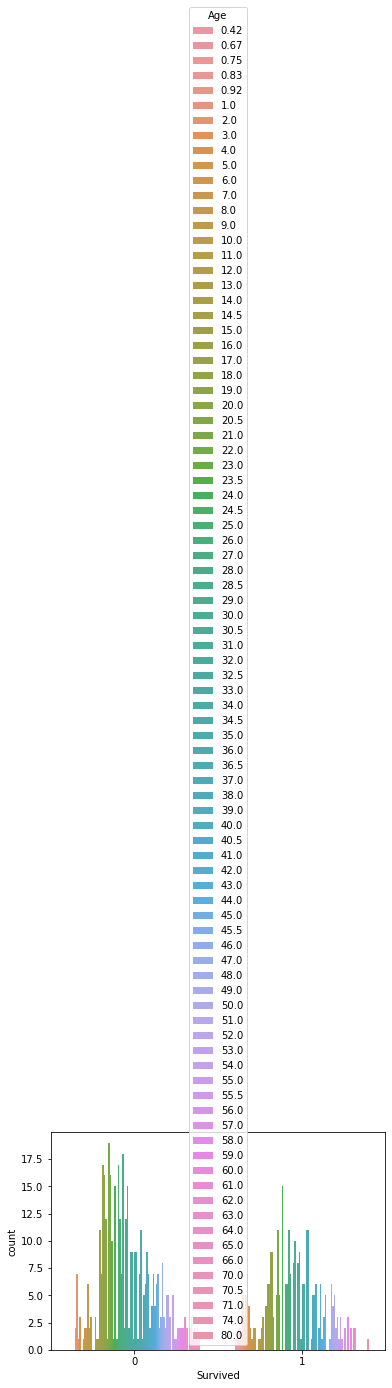

In [20]:
sns.countplot(survived, hue='Age', data=dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

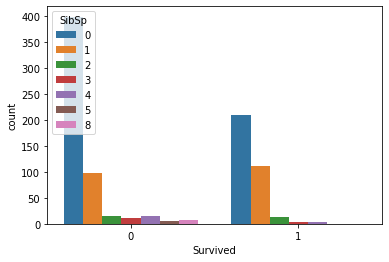

In [21]:
sns.countplot(survived, hue='SibSp', data=dataset)

<AxesSubplot:xlabel='Survived', ylabel='count'>

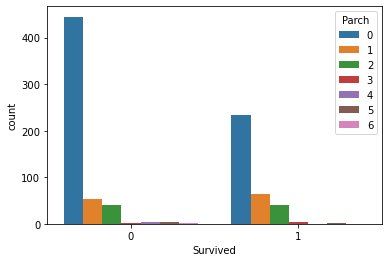

In [22]:
sns.countplot(survived, hue='Parch', data=dataset)

In [23]:
# So let say feature selection is done on the basis of visuals and graphs
y = dataset['Survived']

In [24]:
# We obviously know that name, fare, ticket number won't affect the survival, therefore we can eliminate it using human's mind.
X = dataset[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Cabin', 'Embarked']]

In [25]:
X

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,22.0,1,0,NaN,S
1,1,female,38.0,1,0,C85,C
2,3,female,26.0,0,0,NaN,S
3,1,female,35.0,1,0,C123,S
4,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,NaN,S
887,1,female,19.0,0,0,B42,S
888,3,female,NaN,1,2,NaN,S
889,1,male,26.0,0,0,C148,C


In [26]:
# Whatever dataset we have, ML will not understand the string datatype, therefore we need to convert it to number. We can see 
# that sex is a categorical variable, it has 2 categories - male and female, so our requirement is to convert this categorical
# variable to dummy variables, and because the datatype is string, first we need to do LABEL ENCODING.
# So we need to perform 2 operations:
#1) LABEL ENCODING (STRING ---> NUMBER)    2) ONE-HOT ENCODING (CATEGORICAL VARIABLE ---> DUMMY VARIABLES)
# But these encodings are very common, so pandas has a pre-created function(get_dummies) for this, it will automatically detect 
#the categorical variable and convert it to dummy variables.
sex = X['Sex']

In [27]:
sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [28]:
# We just need to provide the variable name and in one single function, it will do both label and one-hot encoding.
pd.get_dummies(sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [29]:
# But we know that whenever we convert the categorical variable to dummy variables, we need to drop or eliminate one column to
# remove DUMMY-VARIABLE TRAP.
pd.get_dummies(sex, drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [30]:
# store it in 'sex' variable
sex = pd.get_dummies(sex, drop_first=True)

In [31]:
# There is another categorical variable - 'Pclass', but this time label encoding is not required.
pclass = X['Pclass']

In [32]:
pd.get_dummies(pclass, drop_first=True)

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
886,1,0
887,0,0
888,0,1
889,0,0


In [33]:
pclass = pd.get_dummies(pclass, drop_first=True)

In [34]:
# Similarly we can do for embarked, SibSp(Siblings-parent ration) and Parch(Parent-Child ratio)
Sibsp = X['SibSp']

In [35]:
Sibsp = pd.get_dummies(Sibsp, drop_first=True)

In [36]:
embarked = X['Embarked']

In [37]:
embarked = pd.get_dummies(embarked, drop_first=True)

In [38]:
parch = X['Parch']

In [39]:
parch = pd.get_dummies(parch, drop_first=True)

In [40]:
# Now look at the column 'Cabin', first we need to decide whether it's an important feature or not, if you've noticed, almost
# all the values in cabin column is NaN or Null and ML won't work without the information. WIthout having the values, we can't
# do anything in ML. In age column also, vey few values are missing.

In [41]:
# Sometimes, it's harder to see the MISSING VALUES in a huge dataset, so pandas provides us a function isnull():
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [42]:
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
# So it will write "TRUE", wherever the values are missing in the dataset, another more better way to visualize the missing
# values is with the help of visuals and graphs -- HEATMAP GRAPH
sns.heatmap(dataset)

TypeError: '<=' not supported between instances of 'int' and 'str'

<AxesSubplot:>

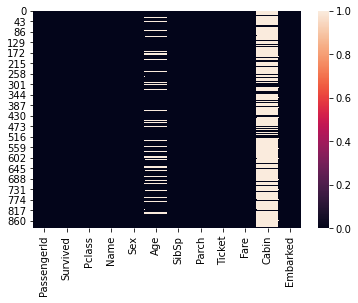

In [44]:
# It failed because it only needs boolean - TRUE OR FALSE
sns.heatmap(dataset.isnull())

In [45]:
# We can see that in 'Cabin' column most of the values are missing - almost 95% values are missing and we can't put random 
# values, otherwise the model won't be correct. And it's impossible to go and find out these values, so we can directly
# eliminate the cabin column. To remove the column field, we can either remove it directly or pandas provides us a drop 
# function.
X.drop('Cabin')

KeyError: "['Cabin'] not found in axis"

In [46]:
# It failed because the datatype of X is pandas and pandas denotes the rows and columns in axis. ROWS - AXIS=0, COLUMNS - AXIS 1
# and because in pandas, most operations are performed on rows, so the default axis is axis 0, and the error shows that there
# is no field 'CABIN' in any of the row. So we need to change the axis to axis 1
X.drop('Cabin', axis=1)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,NaN,1,2,S
889,1,male,26.0,0,0,C


In [47]:
X
# Now you can again see the cabin field, because it's dropped temporarily, to make it permanent, you can either update the 
# variable(it will increase the time and space complexity) or you can use a keyword 'implace'.

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,3,male,22.0,1,0,NaN,S
1,1,female,38.0,1,0,C85,C
2,3,female,26.0,0,0,NaN,S
3,1,female,35.0,1,0,C123,S
4,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,NaN,S
887,1,female,19.0,0,0,B42,S
888,3,female,NaN,1,2,NaN,S
889,1,male,26.0,0,0,C148,C


In [48]:
X.drop('Cabin', axis=1, inplace= True)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [49]:
X

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,22.0,1,0,S
1,1,female,38.0,1,0,C
2,3,female,26.0,0,0,S
3,1,female,35.0,1,0,S
4,3,male,35.0,0,0,S
...,...,...,...,...,...,...
886,2,male,27.0,0,0,S
887,1,female,19.0,0,0,S
888,3,female,NaN,1,2,S
889,1,male,26.0,0,0,C


In [50]:
# The above steps we did is known as DATA CLEANING. Data cleaning refers to identifying and correcting errors in the dataset 
# that may negatively impact a predictive model. Data cleaning is used to refer to all kinds of tasks and activities to detect 
# and repair errors in the data. So for cleaning the data, we can either fill out the missing values(if there are very few
# missing values) or we can directly remove the column(if missing values are huge). Again, of we look at the 'Age' column,
# there are very few missing values - around 5-10% values are missing. 

In [51]:
# If feature is significant and very few values are missing, then we can fill it using some logic. We can find average for 
# separate Pclasses -1,2 and 3 using excel and fill it manually but it's difficult to fill the values manually in a big
# dataset, so we can use python and ML for both - finding out the average and filling the missing values.
dataset['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [52]:
age = dataset['Age']

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

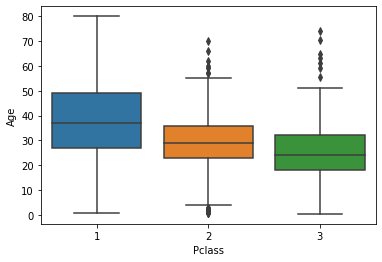

In [53]:
# For finding average using visuals, sns provides us boxplot graph
sns.boxplot(y='Age', x ='Pclass', data=dataset)

In [54]:
# The black line in the middle of the box will tell us the average, so it's completely our choice how we find the average -
# using graphs or visuals or excel sheet or using some python code.

In [55]:
# Now we can tell our python code to fill out the missing values in the dataset.
def lw(cols):
    Pclass=cols[1]
    age=cols[0]
    
    if pd.isnull(age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        elif Pclass == 3:
            return 25
        else:
            return 30
    else:
        return age

In [56]:
# Now the function is created, we can either use 'for loop' to pass the values of a1 and p1 or pandas provides us a function
# 'apply' for doing the same.
dataset[['Age', 'Pclass']].apply(lw)

Age       22.0
Pclass     3.0
dtype: float64

In [57]:
# You won't see the proper output, because again we need to change the axis 0 to axis 1.
dataset[['Age', 'Pclass']].apply(lw, axis=1)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Length: 891, dtype: float64

In [58]:
age = dataset[['Age', 'Pclass']].apply(lw, axis=1)

In [59]:
# so it will fill the missing values.
age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Length: 891, dtype: float64

In [60]:
X['Age'] = age

<ipython-input-60-6680421d03ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = age


In [61]:
age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    25.0
889    26.0
890    32.0
Length: 891, dtype: float64

<AxesSubplot:>

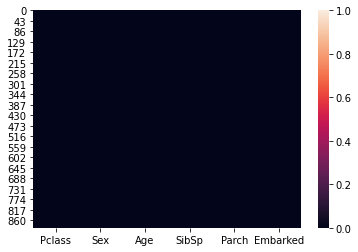

In [62]:
# Now if again try to create a heatmap, now our dataset is X, now it's very clean.
sns.heatmap(X.isnull())

<AxesSubplot:>

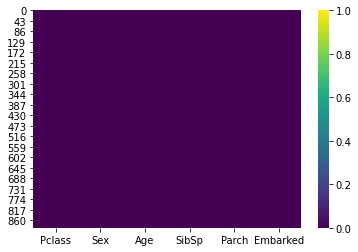

In [63]:
# We can also change the color of the graph
sns.heatmap(X.isnull(), cmap='viridis')

In [64]:
# We can also use linear regression to fill out the missing values of the age.

In [66]:
# We did feature engineering on every feature separately and now we need to concatenate it. So for concatenate, pandas have
# a function "concat"
pd.concat([age, pclass, Sibsp, sex, y], axis =1)

,0,2,3,1,2,3,4,5,8,male,Survived
0,22.0,0,1,1,0,0,0,0,0,1,0
1,38.0,0,0,1,0,0,0,0,0,0,1
2,26.0,0,1,0,0,0,0,0,0,0,1
3,35.0,0,0,1,0,0,0,0,0,0,1
4,35.0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,1,0,0,0,0,0,0,0,1,0
887,19.0,0,0,0,0,0,0,0,0,0,1
888,25.0,0,1,1,0,0,0,0,0,0,0
889,26.0,0,0,0,0,0,0,0,0,1,1


In [67]:
# final dataset
dataset_final = pd.concat([age, pclass, Sibsp, sex, y], axis=1)

In [68]:
# Now the dataset is in the correct format, but there might be a possiblity that some of the columns or rows might have some
# missing values, so removing few observations won't affect the final value very much. For removing the rows which has missing
# or NaN or null values, we have a function "dropna()"
dataset_final.dropna()

,0,2,3,1,2,3,4,5,8,male,Survived
0,22.0,0,1,1,0,0,0,0,0,1,0
1,38.0,0,0,1,0,0,0,0,0,0,1
2,26.0,0,1,0,0,0,0,0,0,0,1
3,35.0,0,0,1,0,0,0,0,0,0,1
4,35.0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,1,0,0,0,0,0,0,0,1,0
887,19.0,0,0,0,0,0,0,0,0,0,1
888,25.0,0,1,1,0,0,0,0,0,0,0
889,26.0,0,0,0,0,0,0,0,0,1,1


In [69]:
dataset_final = dataset_final.dropna()

In [70]:
# So we preprocessed the data, now we need to separate X(features) and y(target-value)
y = dataset_final['Survived']

In [71]:
# Because there are some columns with the same name, we can use iloc function in pandas to specify the index
dataset_final.iloc[: , :-1]

,0,2,3,1,2,3,4,5,8,male
0,22.0,0,1,1,0,0,0,0,0,1
1,38.0,0,0,1,0,0,0,0,0,0
2,26.0,0,1,0,0,0,0,0,0,0
3,35.0,0,0,1,0,0,0,0,0,0
4,35.0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,27.0,1,0,0,0,0,0,0,0,1
887,19.0,0,0,0,0,0,0,0,0,0
888,25.0,0,1,1,0,0,0,0,0,0
889,26.0,0,0,0,0,0,0,0,0,1


In [72]:
X = dataset_final.iloc[: , :-1]

In [73]:
# Now we can create our model, and the target value is survival which can be either 0 or 1 -- BINARY CLASSIFICATION
# SIMPLEST ALGO FOR BINARY CLASSIFICATION - LOGISTIC REGRESSION, but we need to split the data into test and train
X.shape

(891, 10)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 42)

In [76]:
X_train.shape

(712, 10)

In [77]:
# import logistic regression
from sklearn.linear_model import LogisticRegression

In [78]:
# to create an empty mind
model = LogisticRegression()

In [79]:
# ML: MODEL TRAINING : DUMPING THE DATA INTO EMPTY MIND
model.fit(X_train, y_train)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
# Now model has been trained, let's use X_test to check the accuracy of the model we created and because we know the real 
# answers, we can compare it
X_test

,0,2,3,1,2,3,4,5,8,male
709,25.0,0,1,1,0,0,0,0,0,1
439,31.0,1,0,0,0,0,0,0,0,1
840,20.0,0,1,0,0,0,0,0,0,1
720,6.0,1,0,0,0,0,0,0,0,0
39,14.0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
433,17.0,0,1,0,0,0,0,0,0,1
773,25.0,0,1,0,0,0,0,0,0,1
25,38.0,0,1,1,0,0,0,0,0,0
84,17.0,1,0,0,0,0,0,0,0,0


In [81]:
model.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [82]:
# let's compare the values:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

In [83]:
# This model might not give very high accuracy because:
# 1) We use the simplest and the most basic algorithm for binary classification - LOGISTIC REGRESSION.
# 2) We missed some information like "embarked" column.
# 3) There is some more data-processing we need to do on it.
# But still if we compare the values, we can say that 4 out of 5 values is correct~ around 80% accuracy, but if the requirement
# is to compare all the values to see the actual accuracy, we have a method called CONFUSION METRICS.

# NOTE: CONFUSION METRICS WILL HELP US TO KNOW THE ACCURACY OF THE MODEL ONLY IN CASE OF "BINARY CLASSIFICATION".

In [84]:
# We can store the predicted target values in "y_pred" variable:
y_pred = model.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix

In [91]:
confusion_matrix(y_test, y_pred)

array([[93, 12],
       [21, 53]], dtype=int64)

In [91]:
# We get around 80% accuracy. And it's good :)